In [19]:
import scanpy as sc #for scanpy >= 1.3.7
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scvi

## Read in Ferret + Mouse data

In [20]:
adata_ferret=sc.read_h5ad("ferret_anndata_objects/ferret_preprocessing_checkpoint.h5ad")

In [21]:
adata_ferret

AnnData object with n_obs × n_vars = 58275 × 17240
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'annotated', 'annotated_specific'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', "dendrogram_['louvain_r1']", 'hvg', 'louvain', 'louvain_r1', 'louvain_r1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [22]:
adata_ferret.var["gene_ids"]

MAGED2                ENSMPUG00000008115
ENSMPUG00000007244    ENSMPUG00000007244
ENSMPUG00000017445    ENSMPUG00000017445
DPP7                  ENSMPUG00000017446
ENSMPUG00000025508    ENSMPUG00000025508
                             ...        
ENSMPUG00000002654    ENSMPUG00000002654
ENSMPUG00000011063    ENSMPUG00000011063
ENSMPUG00000014451    ENSMPUG00000014451
ENSMPUG00000014454    ENSMPUG00000014454
ENSMPUG00000005456    ENSMPUG00000005456
Name: gene_ids, Length: 17240, dtype: object

In [23]:
adata_ferret.var_names = [x.title() for x in adata_ferret.var_names] 

In [24]:
## Subset Ferret data to Bipolar 
adata_ferret_bipolar = adata_ferret[adata_ferret.obs["annotated"] == "Bipolar"]

In [25]:
adata_ferret_bipolar

View of AnnData object with n_obs × n_vars = 8943 × 17240
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'annotated', 'annotated_specific'
    var: 'gene_ids', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', "dendrogram_['louvain_r1']", 'hvg', 'louvain', 'louvain_r1', 'louvain_r1_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [26]:
adata_ferret_bipolar.obs["annotated"].value_counts()

Bipolar    8943
Name: annotated, dtype: int64

In [27]:
adata_ferret_bipolar.obs

,batch,n_counts,log_counts,n_genes,mt_frac,louvain_r1,annotated,annotated_specific
possorted_genome_bam_0ZS5M:CGAGTGCGTCCGGTCAx-0,0,1132.0,7.031741,779,0.002650,18,Bipolar,Bipolar #3
possorted_genome_bam_0ZS5M:TAACGACTCGCAAGAGx-0,0,1008.0,6.915723,767,0.001984,30,Bipolar,Bipolar #6
possorted_genome_bam_0ZS5M:TAATCTCTCCTGATAGx-0,0,1540.0,7.339538,1043,0.003247,18,Bipolar,Bipolar #3
possorted_genome_bam_0ZS5M:TTGGTTTAGTGCGACAx-0,0,1298.0,7.168580,881,0.000770,18,Bipolar,Bipolar #3
possorted_genome_bam_URO2O:AACACACTCCGACATAx-1,1,446.0,6.100319,365,0.000000,12,Bipolar,Bipolar #2
...,...,...,...,...,...,...,...,...
possorted_genome_bam_VG3LQ:TTTGGTTGTCTCTCTGx-7,7,4083.0,8.314588,2096,0.001714,2,Bipolar,Bipolar #1
possorted_genome_bam_VG3LQ:TTTGGTTGTTCAAGGGx-7,7,3095.0,8.037543,1644,0.001616,2,Bipolar,Bipolar #1
possorted_genome_bam_VG3LQ:TTTCATGCACAGTGAGx-7,7,569.0,6.343881,431,0.000000,20,Bipolar,Bipolar #4
possorted_genome_bam_VG3LQ:TTTCATGTCACTGGTAx-7,7,3243.0,8.084254,1632,0.003700,2,Bipolar,Bipolar #1


In [28]:
adata_mouse_bipolar = sc.read_h5ad("mouse_anndata_objects/mouse_bipolar_preprocessing_checkpoint.h5ad")

In [29]:
adata_mouse_bipolar

AnnData object with n_obs × n_vars = 24674 × 16450
    obs: 'type', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'louvain_r0.5', 'annotated'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'annotated_colors', 'batch_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'louvain', 'louvain_r0.5_colors', 'louvain_r1_colors', 'neighbors', 'pca', 'type_colors', 'umap'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [30]:
adata_mouse_bipolar.var_names = [x.title() for x in adata_mouse_bipolar.var_names] 

In [31]:
adata_mouse_bipolar.obs["batch"] = "8"

In [32]:
adata_mouse_bipolar.obs

,type,batch,n_counts,log_counts,n_genes,mt_frac,louvain_r1,louvain_r0.5,annotated
Vsx2Drop_Bipolar1_CAAAGCATTTGC,BC6,8,3131.0,8.049108,1674,0.029384,3,0,Bipolar
Vsx2Drop_Bipolar1_CTTTTGATTGAC,BC7,8,3321.0,8.108021,1727,0.031918,6,6,Bipolar
Vsx2Drop_Bipolar1_GCTCCAATGACA,RBC,8,3468.0,8.151334,1845,0.020761,3,0,Bipolar
Vsx2Drop_Bipolar1_AAATACCCTCAT,BC5A,8,3004.0,8.007700,1635,0.024301,4,3,Bipolar
Vsx2Drop_Bipolar1_TGCATGCGTCCA,BC6,8,3522.0,8.166784,1927,0.017888,0,0,Bipolar
...,...,...,...,...,...,...,...,...,...
Vsx2Drop_Bipolar6_GGTAGTTTTAGG,BC6,8,768.0,6.643790,606,0.045573,7,7,Bipolar
Vsx2Drop_Bipolar6_GTTAAGGCAGGA,RBC,8,787.0,6.668228,607,0.012706,1,1,Bipolar
Vsx2Drop_Bipolar6_GACTGCGCACAT,BC7,8,777.0,6.655440,621,0.021879,6,6,Bipolar
Vsx2Drop_Bipolar6_GCGATCCGGGTA,BC5A,8,768.0,6.643790,630,0.035156,4,3,Bipolar


## Concatenate datasets

In [33]:
adata = adata_ferret_bipolar.concatenate(adata_mouse_bipolar, batch_key = "concat_batch")

In [34]:
adata

AnnData object with n_obs × n_vars = 33617 × 10024
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'annotated', 'annotated_specific', 'type', 'louvain_r0.5', 'concat_batch'
    var: 'gene_ids-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'

In [35]:
adata.obs

,batch,n_counts,log_counts,n_genes,mt_frac,louvain_r1,annotated,annotated_specific,type,louvain_r0.5,concat_batch
possorted_genome_bam_0ZS5M:CGAGTGCGTCCGGTCAx-0-0,0,1132.0,7.031741,779,0.002650,18,Bipolar,Bipolar #3,NaN,NaN,0
possorted_genome_bam_0ZS5M:TAACGACTCGCAAGAGx-0-0,0,1008.0,6.915723,767,0.001984,30,Bipolar,Bipolar #6,NaN,NaN,0
possorted_genome_bam_0ZS5M:TAATCTCTCCTGATAGx-0-0,0,1540.0,7.339538,1043,0.003247,18,Bipolar,Bipolar #3,NaN,NaN,0
possorted_genome_bam_0ZS5M:TTGGTTTAGTGCGACAx-0-0,0,1298.0,7.168580,881,0.000770,18,Bipolar,Bipolar #3,NaN,NaN,0
possorted_genome_bam_URO2O:AACACACTCCGACATAx-1-0,1,446.0,6.100319,365,0.000000,12,Bipolar,Bipolar #2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
Vsx2Drop_Bipolar6_GGTAGTTTTAGG-1,8,768.0,6.643790,606,0.045573,7,Bipolar,NaN,BC6,7,1
Vsx2Drop_Bipolar6_GTTAAGGCAGGA-1,8,787.0,6.668228,607,0.012706,1,Bipolar,NaN,RBC,1,1
Vsx2Drop_Bipolar6_GACTGCGCACAT-1,8,777.0,6.655440,621,0.021879,6,Bipolar,NaN,BC7,6,1
Vsx2Drop_Bipolar6_GCGATCCGGGTA-1,8,768.0,6.643790,630,0.035156,4,Bipolar,NaN,BC5A,3,1


## Read in orthologs data

In [36]:
orthologs=pd.read_csv('Ferret_Orthologs.txt', sep="\t",
            header=0)

In [37]:
len(orthologs)

20178

In [38]:
orthologs

,Gene stable ID,Gene name,Ferret gene stable ID,Ferret gene name,Ferret homology type,"Ferret orthology confidence [0 low, 1 high]"
0,ENSMUSG00000094915,AC168977.2,ENSMPUG00000004541,SP100,ortholog_one2many,0
1,ENSMUSG00000079808,AC168977.1,ENSMPUG00000004337,NaN,ortholog_one2many,0
2,ENSMUSG00000094741,AC140325.3,ENSMPUG00000016357,NaN,ortholog_one2many,0
3,ENSMUSG00000074720,AC140325.1,ENSMPUG00000016357,NaN,ortholog_one2many,0
4,ENSMUSG00000094337,AC140325.2,ENSMPUG00000016357,NaN,ortholog_one2many,0
...,...,...,...,...,...,...
20173,ENSMUSG00000093413,Snora15,ENSMPUG00000023156,NaN,ortholog_one2one,0
20174,ENSMUSG00000077565,Gm23201,ENSMPUG00000021269,NaN,ortholog_one2many,1
20175,ENSMUSG00000077515,Gm25878,ENSMPUG00000020308,NaN,ortholog_one2one,1
20176,ENSMUSG00000119717,AL603664.1,ENSMPUG00000021607,U3,ortholog_one2many,0


In [39]:
one_to_one_table = orthologs[orthologs['Ferret homology type'] == 'ortholog_one2one']

In [40]:
len(one_to_one_table)

15178

In [41]:
one_to_one_table

,Gene stable ID,Gene name,Ferret gene stable ID,Ferret gene name,Ferret homology type,"Ferret orthology confidence [0 low, 1 high]"
24,ENSMUSG00000095041,AC149090.1,ENSMPUG00000012782,PISD,ortholog_one2one,0
173,ENSMUSG00000101725,Gm29423,ENSMPUG00000001271,NaN,ortholog_one2one,0
226,ENSMUSG00000063889,Crem,ENSMPUG00000005982,CREM,ortholog_one2one,0
227,ENSMUSG00000024231,Cul2,ENSMPUG00000005959,CUL2,ortholog_one2one,0
228,ENSMUSG00000024232,Bambi,ENSMPUG00000015071,BAMBI,ortholog_one2one,0
...,...,...,...,...,...,...
20170,ENSMUSG00000088169,Gm22059,ENSMPUG00000022246,NaN,ortholog_one2one,0
20171,ENSMUSG00000088008,Gm25492,ENSMPUG00000023561,NaN,ortholog_one2one,0
20172,ENSMUSG00000065304,Gm23245,ENSMPUG00000023375,NaN,ortholog_one2one,1
20173,ENSMUSG00000093413,Snora15,ENSMPUG00000023156,NaN,ortholog_one2one,0


In [42]:
one2one_orthologs=list(one_to_one_table["Gene name"])

In [43]:
one2one_orthologs = [x.title() for x in one2one_orthologs] 

In [44]:
len(one2one_orthologs)

15178

## Finding common orthologs

In [45]:
common_orthologs=[x for x in one2one_orthologs if x in adata.var_names]

In [46]:
len(common_orthologs)

9695

## Subset dataset to common orthologs

In [47]:
adata = adata[:, common_orthologs]

In [48]:
adata

View of AnnData object with n_obs × n_vars = 33617 × 9695
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'annotated', 'annotated_specific', 'type', 'louvain_r0.5', 'concat_batch'
    var: 'gene_ids-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'

In [49]:
adata.obs

,batch,n_counts,log_counts,n_genes,mt_frac,louvain_r1,annotated,annotated_specific,type,louvain_r0.5,concat_batch
possorted_genome_bam_0ZS5M:CGAGTGCGTCCGGTCAx-0-0,0,1132.0,7.031741,779,0.002650,18,Bipolar,Bipolar #3,NaN,NaN,0
possorted_genome_bam_0ZS5M:TAACGACTCGCAAGAGx-0-0,0,1008.0,6.915723,767,0.001984,30,Bipolar,Bipolar #6,NaN,NaN,0
possorted_genome_bam_0ZS5M:TAATCTCTCCTGATAGx-0-0,0,1540.0,7.339538,1043,0.003247,18,Bipolar,Bipolar #3,NaN,NaN,0
possorted_genome_bam_0ZS5M:TTGGTTTAGTGCGACAx-0-0,0,1298.0,7.168580,881,0.000770,18,Bipolar,Bipolar #3,NaN,NaN,0
possorted_genome_bam_URO2O:AACACACTCCGACATAx-1-0,1,446.0,6.100319,365,0.000000,12,Bipolar,Bipolar #2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
Vsx2Drop_Bipolar6_GGTAGTTTTAGG-1,8,768.0,6.643790,606,0.045573,7,Bipolar,NaN,BC6,7,1
Vsx2Drop_Bipolar6_GTTAAGGCAGGA-1,8,787.0,6.668228,607,0.012706,1,Bipolar,NaN,RBC,1,1
Vsx2Drop_Bipolar6_GACTGCGCACAT-1,8,777.0,6.655440,621,0.021879,6,Bipolar,NaN,BC7,6,1
Vsx2Drop_Bipolar6_GCGATCCGGGTA-1,8,768.0,6.643790,630,0.035156,4,Bipolar,NaN,BC5A,3,1


In [50]:
adata.obs["type"] = adata.obs["type"].replace(np.nan, "Unknown", regex = True)

Trying to set attribute `.obs` of view, copying.


In [51]:
adata

AnnData object with n_obs × n_vars = 33617 × 9695
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'annotated', 'annotated_specific', 'type', 'louvain_r0.5', 'concat_batch'
    var: 'gene_ids-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'

In [52]:
adata.obs

,batch,n_counts,log_counts,n_genes,mt_frac,louvain_r1,annotated,annotated_specific,type,louvain_r0.5,concat_batch
possorted_genome_bam_0ZS5M:CGAGTGCGTCCGGTCAx-0-0,0,1132.0,7.031741,779,0.002650,18,Bipolar,Bipolar #3,Unknown,NaN,0
possorted_genome_bam_0ZS5M:TAACGACTCGCAAGAGx-0-0,0,1008.0,6.915723,767,0.001984,30,Bipolar,Bipolar #6,Unknown,NaN,0
possorted_genome_bam_0ZS5M:TAATCTCTCCTGATAGx-0-0,0,1540.0,7.339538,1043,0.003247,18,Bipolar,Bipolar #3,Unknown,NaN,0
possorted_genome_bam_0ZS5M:TTGGTTTAGTGCGACAx-0-0,0,1298.0,7.168580,881,0.000770,18,Bipolar,Bipolar #3,Unknown,NaN,0
possorted_genome_bam_URO2O:AACACACTCCGACATAx-1-0,1,446.0,6.100319,365,0.000000,12,Bipolar,Bipolar #2,Unknown,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
Vsx2Drop_Bipolar6_GGTAGTTTTAGG-1,8,768.0,6.643790,606,0.045573,7,Bipolar,NaN,BC6,7,1
Vsx2Drop_Bipolar6_GTTAAGGCAGGA-1,8,787.0,6.668228,607,0.012706,1,Bipolar,NaN,RBC,1,1
Vsx2Drop_Bipolar6_GACTGCGCACAT-1,8,777.0,6.655440,621,0.021879,6,Bipolar,NaN,BC7,6,1
Vsx2Drop_Bipolar6_GCGATCCGGGTA-1,8,768.0,6.643790,630,0.035156,4,Bipolar,NaN,BC5A,3,1


In [53]:
adata.obs["type"]

possorted_genome_bam_0ZS5M:CGAGTGCGTCCGGTCAx-0-0    Unknown
possorted_genome_bam_0ZS5M:TAACGACTCGCAAGAGx-0-0    Unknown
possorted_genome_bam_0ZS5M:TAATCTCTCCTGATAGx-0-0    Unknown
possorted_genome_bam_0ZS5M:TTGGTTTAGTGCGACAx-0-0    Unknown
possorted_genome_bam_URO2O:AACACACTCCGACATAx-1-0    Unknown
                                                     ...   
Vsx2Drop_Bipolar6_GGTAGTTTTAGG-1                        BC6
Vsx2Drop_Bipolar6_GTTAAGGCAGGA-1                        RBC
Vsx2Drop_Bipolar6_GACTGCGCACAT-1                        BC7
Vsx2Drop_Bipolar6_GCGATCCGGGTA-1                       BC5A
Vsx2Drop_Bipolar6_GGGACCTCAGGC-1                         MG
Name: type, Length: 33617, dtype: object

## Remove Features

... storing 'batch' as categorical
... storing 'louvain_r1' as categorical
... storing 'annotated_specific' as categorical
... storing 'type' as categorical
... storing 'louvain_r0.5' as categorical


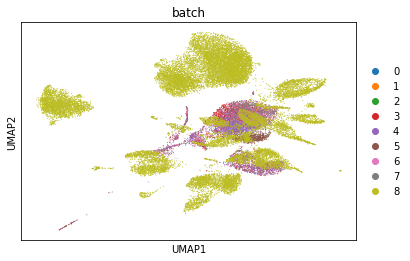

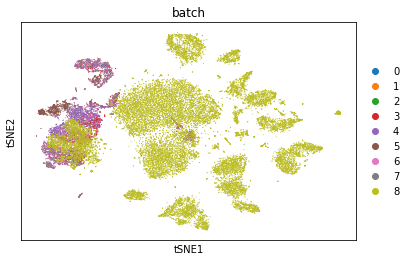

In [54]:
sc.pl.umap(adata, color = "batch")
sc.pl.tsne(adata, color = "batch")

In [55]:
adata

AnnData object with n_obs × n_vars = 33617 × 9695
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'louvain_r1', 'annotated', 'annotated_specific', 'type', 'louvain_r0.5', 'concat_batch'
    var: 'gene_ids-0', 'n_cells-0', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0', 'n_cells-1', 'highly_variable-1', 'means-1', 'dispersions-1', 'dispersions_norm-1'
    uns: 'batch_colors'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    layers: 'counts'

In [56]:
del adata.obs["louvain_r1"]
del adata.obs["louvain_r0.5"]
del adata.obs["concat_batch"]

del adata.var["highly_variable-0"]
del adata.var["highly_variable-1"]
del adata.var["means-0"]
del adata.var["means-1"]
del adata.var["dispersions-0"]
del adata.var["dispersions-1"]
del adata.var["dispersions_norm-0"]
del adata.var["dispersions_norm-1"]

del adata.obsm["X_pca"]
del adata.obsm["X_tsne"]
del adata.obsm["X_umap"]

In [57]:
adata

AnnData object with n_obs × n_vars = 33617 × 9695
    obs: 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'annotated', 'annotated_specific', 'type'
    var: 'gene_ids-0', 'n_cells-0', 'n_cells-1'
    uns: 'batch_colors'
    layers: 'counts'

## Feature Selection 

In [58]:
sc.pp.highly_variable_genes(adata, flavor='cell_ranger', n_top_genes=3000)
print('\n','Number of highly variable genes: {:d}'.format(np.sum(adata.var['highly_variable'])))


 Number of highly variable genes: 2999


In [59]:
adata.write("ferret_bipolar_annotation_prep_checkpoint.h5ad")